In [69]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
import joblib
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# **DATA COLLECTION**

In [70]:
df = pd.read_csv('/content/PSL-2016-2022.csv')
df.head()

,psl_year,match_number,team_1,team_2,inning,over,ball,runs,wicket,total_runs,wickets,is_four,is_six,is_wicket,wicket_text,result
0,2016,1,Islamabad United,Quetta Gladiators,1,1,1,0,NaN,0,0,False,False,False,NaN,Gladiators
1,2016,1,Islamabad United,Quetta Gladiators,1,1,2,0,NaN,0,0,False,False,False,NaN,Gladiators
2,2016,1,Islamabad United,Quetta Gladiators,1,1,3,0,NaN,0,0,False,False,False,NaN,Gladiators
3,2016,1,Islamabad United,Quetta Gladiators,1,1,4,0,NaN,0,0,False,False,False,NaN,Gladiators
4,2016,1,Islamabad United,Quetta Gladiators,1,1,5,0,NaN,0,0,False,False,False,NaN,Gladiators


In [71]:
df.describe()

,psl_year,match_number,inning,over,ball,runs,wicket,total_runs,wickets
count,50262.000000,50262.000000,50262.000000,50262.000000,50262.000000,50262.000000,2661.000000,50262.000000,50262.000000
mean,2019.245872,16.463551,1.481159,10.112013,3.608173,1.322251,1.696355,74.971728,2.550436
std,1.948857,9.545572,0.499650,5.640739,1.803698,1.627820,1.093840,48.173246,2.162274
min,2016.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,2018.000000,8.000000,1.000000,5.000000,2.000000,0.000000,1.000000,35.000000,1.000000
50%,2019.000000,16.000000,1.000000,10.000000,4.000000,1.000000,1.000000,71.000000,2.000000
75%,2021.000000,24.000000,2.000000,15.000000,5.000000,1.000000,2.000000,111.000000,4.000000
max,2022.000000,34.000000,2.000000,20.000000,11.000000,7.000000,8.000000,247.000000,10.000000


## **DATA PREPROCESSING**

In [72]:
df['wicket'].unique()

array([nan,  1.,  2.,  3.,  4.,  5.,  6.,  8.])

In [73]:
df['wicket'].fillna(0,inplace = True)
df.head()

,psl_year,match_number,team_1,team_2,inning,over,ball,runs,wicket,total_runs,wickets,is_four,is_six,is_wicket,wicket_text,result
0,2016,1,Islamabad United,Quetta Gladiators,1,1,1,0,0.0,0,0,False,False,False,NaN,Gladiators
1,2016,1,Islamabad United,Quetta Gladiators,1,1,2,0,0.0,0,0,False,False,False,NaN,Gladiators
2,2016,1,Islamabad United,Quetta Gladiators,1,1,3,0,0.0,0,0,False,False,False,NaN,Gladiators
3,2016,1,Islamabad United,Quetta Gladiators,1,1,4,0,0.0,0,0,False,False,False,NaN,Gladiators
4,2016,1,Islamabad United,Quetta Gladiators,1,1,5,0,0.0,0,0,False,False,False,NaN,Gladiators


# **Exploratory Data Analysis (EDA):**

In [74]:
obj=df.groupby(['psl_year','match_number'])

def unique(df):
    return df["result"].unique()[0]

series =obj.apply(func =unique).value_counts()
series

Zalmi         43
United        41
Gladiators    36
Qalandars     30
Sultans       30
Kings         29
tied           4
no_result      2
Name: count, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Zalmi'),
  Text(1, 0, 'United'),
  Text(2, 0, 'Gladiators'),
  Text(3, 0, 'Qalandars'),
  Text(4, 0, 'Sultans'),
  Text(5, 0, 'Kings'),
  Text(6, 0, 'tied'),
  Text(7, 0, 'no_result')])

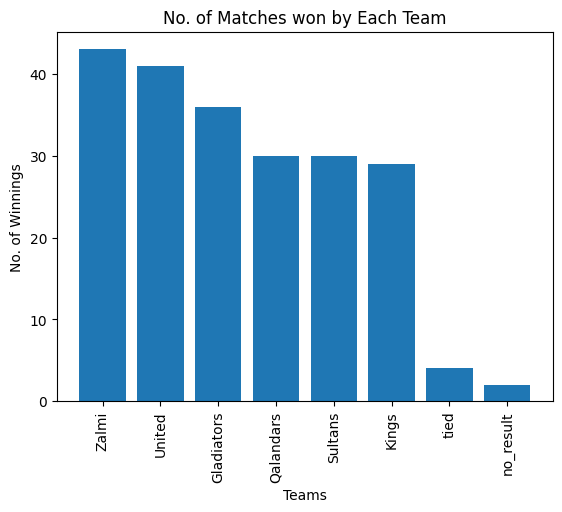

In [75]:
plt.bar(series.index, series.values)
plt.title("No. of Matches won by Each Team")

plt.xlabel("Teams")
plt.ylabel("No. of Winnings")
plt.xticks(rotation ="vertical")

Text(0.5, 1.0, 'Percentage of Matches won by Each Team')

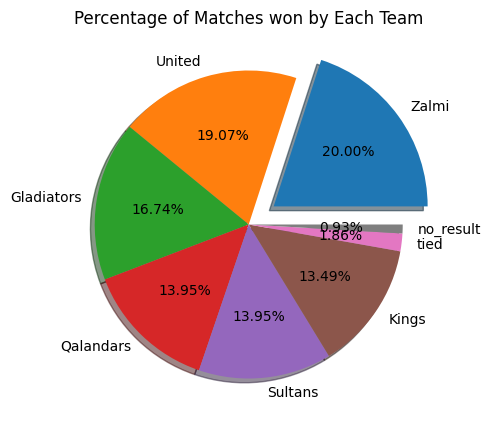

In [76]:
plt.figure(figsize =(10, 5))
plt.pie(series.values, labels =series.index, shadow ="True", autopct ="%.2f%%", explode =[0.2, 0,0,0,0,0,0, 0])
plt.title("Percentage of Matches won by Each Team")

In [77]:
boundries_df =df.groupby(['psl_year']).agg(
    fours = ('is_four','sum'),
    sixes = ('is_six','sum'),
    matches = ('match_number','max')

)
boundries_df = boundries_df.reset_index()
boundries_df



,psl_year,fours,sixes,matches
0,2016,566,247,24
1,2017,552,258,24
2,2018,774,414,34
3,2019,879,377,34
4,2020,873,383,34
5,2021,1010,437,34
6,2022,991,435,34


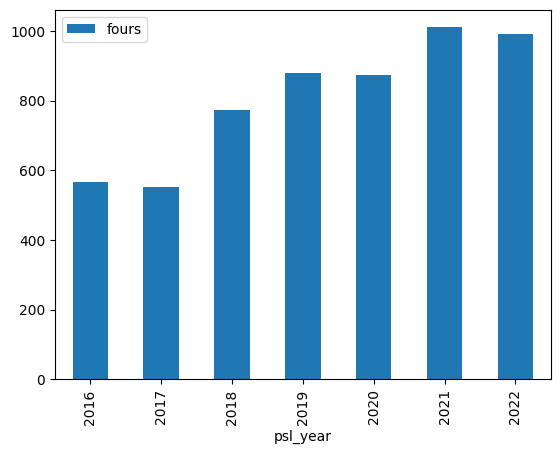

In [78]:
ax =boundries_df.plot('psl_year', 'fours', kind='bar')

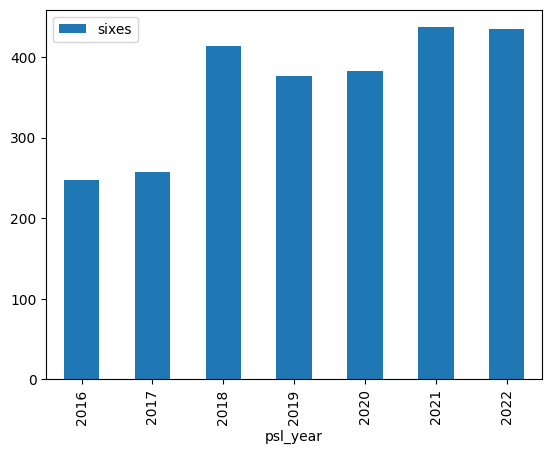

In [79]:
ax = boundries_df.plot('psl_year', 'sixes', kind='bar')


<Axes: title={'center': 'Count of the Dismissal Type'}, xlabel='wicket_text', ylabel='No. Of Outs'>

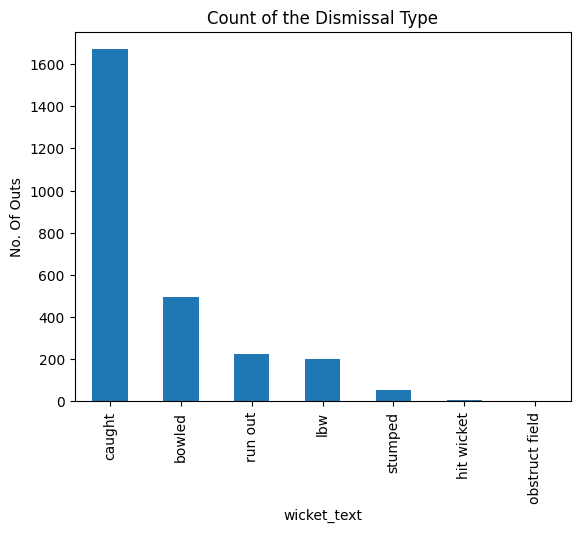

In [80]:
obj =df.groupby(["wicket_text"])
series =obj["wicket_text"].value_counts().sort_values(ascending =False)
# count of the dismissal type
series.plot(kind ="bar", title="Count of the Dismissal Type", ylabel ="No. Of Outs")

# **Feature Engineering**

In [81]:
# Splitting on Innings
first_inning = df[df['inning']==1]
second_inning = df[df['inning']==2]
# Calculating Target
target_runs = first_inning.groupby(["psl_year","match_number"]).agg(
   target= ("runs","sum")
)
target_runs = target_runs.reset_index()
#new feature of target is added

In [82]:
new_df = pd.merge(target_runs, second_inning,  how='left', left_on=['psl_year','match_number'], right_on = ['psl_year','match_number'])

In [83]:
# added new feature of win
def win(row):
  if type(row['result']) == str:
    if row['result'] in row['team_2']:
      return 1
    return 0
  else:
      return 0
new_df['won']=new_df.apply(win,axis=1)


In [84]:
new_df['balls_left'] = 120-(((new_df['over']-1)*6)+new_df['ball'])
# new feature of balls_left is added

In [85]:
final_data = new_df[['over','ball','total_runs','wickets','target','balls_left','won']]
final_data['runs_left'] = final_data['target']- final_data['total_runs']
#added new feature of runs_left
final_data.head()

<ipython-input-85-1527f63f9759>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data['runs_left'] = final_data['target']- final_data['total_runs']


,over,ball,total_runs,wickets,target,balls_left,won,runs_left
0,1.0,1.0,0.0,0.0,128,119.0,1,128.0
1,1.0,2.0,0.0,0.0,128,118.0,1,128.0
2,1.0,3.0,0.0,0.0,128,117.0,1,128.0
3,1.0,4.0,2.0,0.0,128,116.0,1,126.0
4,1.0,5.0,2.0,0.0,128,115.0,1,126.0


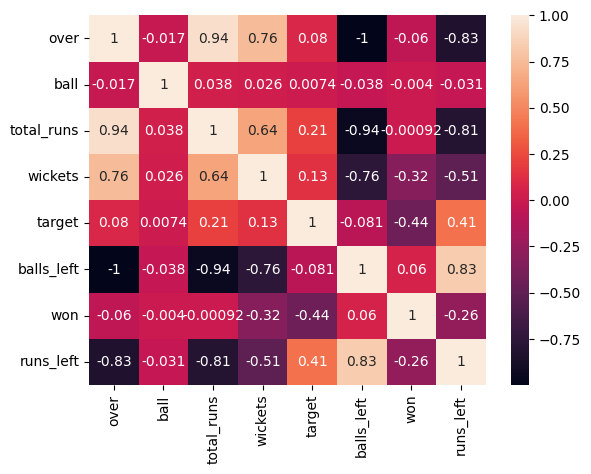

In [86]:
corrMatrix = final_data.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [87]:
psl_df = final_data[['wickets','balls_left','runs_left','won']]
psl_df.head()

,wickets,balls_left,runs_left,won
0,0.0,119.0,128.0,1
1,0.0,118.0,128.0,1
2,0.0,117.0,128.0,1
3,0.0,116.0,126.0,1
4,0.0,115.0,126.0,1


In [88]:
psl_df = psl_df.dropna()

# **Model Building And Evaluation**

In [89]:
X=psl_df.drop("won",axis=1)
y=psl_df['won']


In [90]:
# Train and Test Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 42)

**RANDOM FOREST**

In [91]:
RF = RandomForestClassifier(n_estimators = 1000, max_depth=9, random_state=0)
RF.fit(X_train, y_train)

RandomForestClassifier(max_depth=9, n_estimators=1000, random_state=0)

In [92]:
y_pred = RF.predict(X_test)
print("Accuracy: \n\n",RF.score(X_test,y_test))
print("\n Confusion Matrix: \n\n",confusion_matrix(y_test,y_pred))
print("\n Classification Report: \n\n",classification_report(y_test,y_pred))

Accuracy: 

 0.8052511887533595

 Confusion Matrix: 

 [[1541  518]
 [ 424 2354]]

 Classification Report: 

               precision    recall  f1-score   support

           0       0.78      0.75      0.77      2059
           1       0.82      0.85      0.83      2778

    accuracy                           0.81      4837
   macro avg       0.80      0.80      0.80      4837
weighted avg       0.80      0.81      0.80      4837



**LOGISTIC REGRESSION**

In [153]:
logreg=LogisticRegression(max_iter=1000)

logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [154]:
y_pred_test = logreg.predict(X_test)
print("Accuracy: \n\n",logreg.score(X_test,y_test))
print("\n Confusion Matrix: \n\n",confusion_matrix(y_test,y_pred_test))
print("\n Classification Report: \n\n",classification_report(y_test,y_pred_test))
logreg.predict_proba(X_test)

Accuracy: 

 0.7868513541451313

 Confusion Matrix: 

 [[1503  556]
 [ 475 2303]]

 Classification Report: 

               precision    recall  f1-score   support

           0       0.76      0.73      0.74      2059
           1       0.81      0.83      0.82      2778

    accuracy                           0.79      4837
   macro avg       0.78      0.78      0.78      4837
weighted avg       0.79      0.79      0.79      4837



array([[0.55206841, 0.44793159],
       [0.09475546, 0.90524454],
       [0.72236485, 0.27763515],
       ...,
       [0.93947359, 0.06052641],
       [0.26725787, 0.73274213],
       [0.02954767, 0.97045233]])

In [95]:
nb=GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb=nb.predict(X_test)


In [96]:
print("Accuracy: \n\n",nb.score(X_test,y_test))
print("\n Confusion Matrix: \n\n",confusion_matrix(y_test,y_pred_nb))
print("\n Classification Report: \n\n",classification_report(y_test,y_pred_nb))

Accuracy: 

 0.7066363448418441

 Confusion Matrix: 

 [[ 948 1111]
 [ 308 2470]]

 Classification Report: 

               precision    recall  f1-score   support

           0       0.75      0.46      0.57      2059
           1       0.69      0.89      0.78      2778

    accuracy                           0.71      4837
   macro avg       0.72      0.67      0.67      4837
weighted avg       0.72      0.71      0.69      4837



**CONCLUSION**

**Random Forest is the Best Model**
Based on the evaluation metrics for the three models (Random Forest, logistic regression, and Naive Bayes), it is evident that the Random Forest (RF) model performs the best on the cricket training data. Here's why:

**Highest Accuracy:**
Random Forest: 80.53%
Logistic Regression Classifier: 78.54%
Naive Bayes: 70.66%
The Random Forest model achieves the highest accuracy, indicating that it correctly predicts the outcomes more often than the other models.

**Confusion Matrix Analysis:**
The Random Forest model has the highest number of correct predictions for both classes (1541 true positives and 2354 true negatives), with fewer misclassifications compared to logreg and Naive Bayes.

**Techniques Used By Random Forest:**
The combination of ensemble learning, bagging, feature randomness, variance reduction, handling of missing data and outliers, feature importance, and its non-parametric nature makes Random Forest a powerful and effective model. These techniques collectively contribute to its superior performance compared to logreg Classifier and Naive Bayes on the cricket training data.


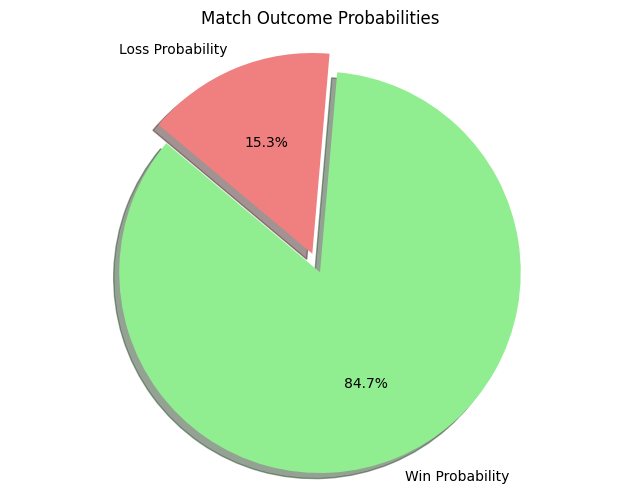

In [124]:
current= {
    "wickets":3,
    "balls_left" :6,
    "runs_left":10}
current_df = pd.DataFrame(current,index=[0])
proba = RF.predict_proba(current_df)

# Extract probabilities for win and loss
win_proba = proba[0, 1]
loss_proba = proba[0, 0]

# Plotting the pie chart
labels = ['Win Probability', 'Loss Probability']
sizes = [win_proba, loss_proba]
colors = ['lightgreen', 'lightcoral']
explode = (0.1, 0)  # Explode the 1st slice (Win Probability)

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Adding a title
plt.title('Match Outcome Probabilities')

# Display the plot
plt.show()

In [156]:
match_df = pd.read_csv('/content/match_test.csv')
match_df['balls_left'] = 120-(((match_df['over']-1)*6)+match_df['ball'])
match_x=match_df[['wickets','balls_left','runs_left']]
proba=logreg.predict_proba(match_x)
proba2=RF.predict_proba(match_x)
proba3=nb.predict_proba(match_x)
win_proba = proba[:, 1]*100
win_proba2 = proba2[:, 1]*100
win_proba3 = proba3[:, 1]*100
balls=match_df['balls_left'][::-1].values
wickets=match_df['wickets']
loss_proba = proba[:, 0]


array([11.34421389, 14.68521805, 14.80365257, 14.92287516, 19.09088087,
       19.23683493, 24.26607546, 30.11979659, 29.11917334, 33.00616672,
       39.85863021, 38.71370929, 38.93748676, 40.5380904 , 39.38643406,
       43.79711086, 44.02916225, 48.54337145, 48.77874467, 48.77874467,
       47.58030863, 52.11957037, 50.92065262, 34.82074066, 33.73934781,
       33.95030019, 32.88230216, 20.14475582, 19.38359714, 18.64448359,
       18.78781733, 18.93199656, 21.87889211, 25.14223072, 25.31997073,
       25.49853924, 25.67793409, 24.77256404, 24.77256404, 24.9485617 ,
       24.06058299, 24.23315178, 24.40656049, 23.5318243 , 26.95663297,
       27.14254886, 33.38428818, 37.53909041, 37.76026153, 37.98194333,
       38.20412772, 37.07743236, 35.96462656, 34.86671252, 33.784632  ,
       20.80590448, 21.92883858, 22.0905656 , 22.25314539, 25.55404592,
       24.65159516, 24.82701702, 23.94198432, 24.1139726 , 24.28680186,
       30.14353281, 29.14244985, 33.03110239, 31.97802057, 32.18

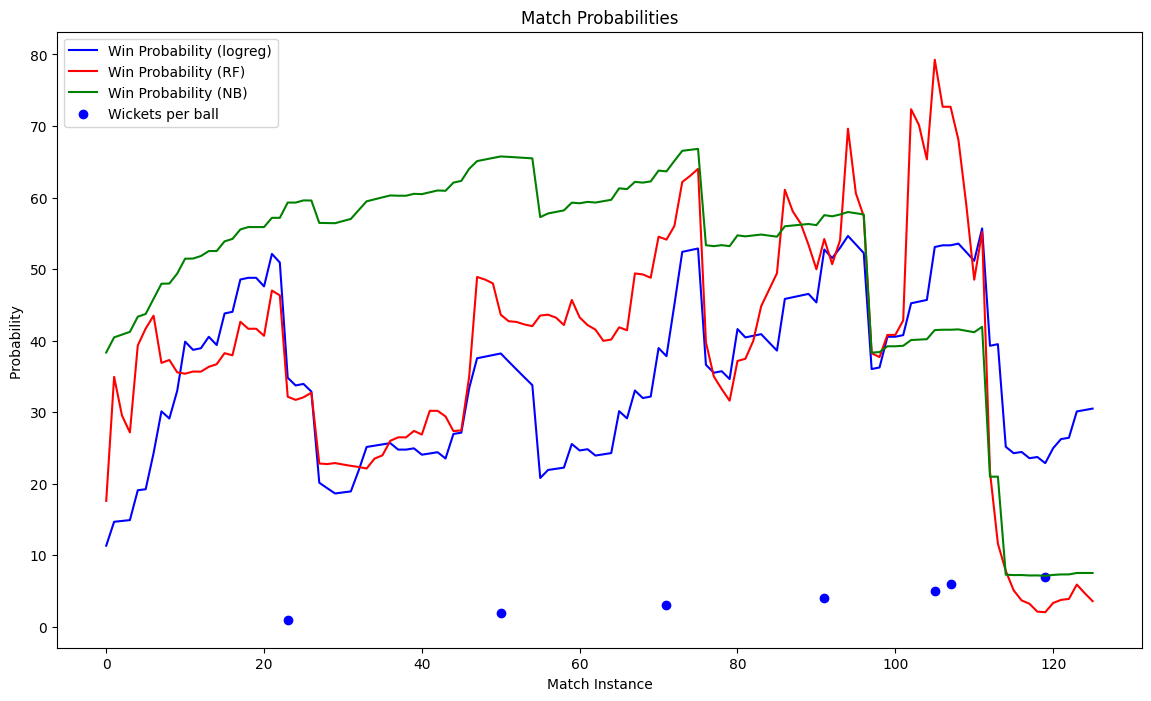

In [157]:
plt.figure(figsize=(14, 8))
balls = [balls[i] for i in range(len(wickets)) if wickets[i] > 0]
wickets = [wickets[i] for i in range(len(wickets)) if wickets[i] > 0]
wicket_balls = []
wicket_numbers = []

# Track wickets
previous_wicket = None
for i in range(len(wickets)):
    current_wicket = wickets[i]
    current_ball = balls[i]

    if current_wicket != previous_wicket:
        if previous_wicket is not None:
            wicket_balls.append(current_ball - 1)
            wicket_numbers.append(previous_wicket)
        previous_wicket = current_wicket

# Append for the last wicket
wicket_balls.append(balls[-1])
wicket_numbers.append(wickets[-1])

# Plot the predicted win probability
plt.plot(win_proba, label='Win Probability (logreg)', color='blue')
plt.plot(win_proba2, label='Win Probability (RF)', color='red')
plt.plot(win_proba3, label='Win Probability (NB)', color='green')
plt.scatter(wicket_balls,wicket_numbers, c='blue', label='Wickets per ball')


# Adding titles and labels
plt.title('Match Probabilities')
plt.xlabel('Match Instance')
plt.ylabel('Probability ')
plt.legend()

# Show the plot
plt.show()

In [100]:
# saving model
joblib.dump(RF, 'my_model.joblib')


['my_model.joblib']

In [101]:
# rf = RandomForestClassifier()

# # Random Forest
# rf_param_grid = {
#     'n_estimators': [500, 1000,5000,10000],
#     'max_depth': [3,6,9],

# }
# rf_grid_search = GridSearchCV(rf, rf_param_grid, cv=5, scoring='accuracy')
# rf_grid_search.fit(X_train, y_train)

# print("Best Random Forest params:", rf_grid_search.best_params_)
# print("Best Random Forest CV Accuracy: {:.2f}".format(rf_grid_search.best_score_))



**RANDOM FOREST WITHOUT PYTHON PACKAGE**

In [102]:
from collections import Counter
from random import random

class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None,*,value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

    def is_leaf_node(self):
        return self.value is not None


class DecisionTree:
    def __init__(self, min_samples_split=2, max_depth=100, n_features=None):
        self.min_samples_split=min_samples_split
        self.max_depth=max_depth
        self.n_features=n_features
        self.root=None

    def fit(self, X, y):
        self.n_features = X.shape[1] if not self.n_features else min(X.shape[1],self.n_features)
        self.root = self._grow_tree(X, y)

    def _grow_tree(self, X, y, depth=0):
        n_samples, n_feats = X.shape
        n_labels = len(np.unique(y))

        # check the stopping criteria
        if (depth>=self.max_depth or n_labels==1 or n_samples<self.min_samples_split):
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)

        feat_idxs = np.random.choice(n_feats, self.n_features, replace=False)

        # find the best split
        best_feature, best_thresh = self._best_split(X, y, feat_idxs)

        # create child nodes
        left_idxs, right_idxs = self._split(X[:, best_feature], best_thresh)
        left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth+1)
        right = self._grow_tree(X[right_idxs, :], y[right_idxs], depth+1)
        return Node(best_feature, best_thresh, left, right)


    def _best_split(self, X, y, feat_idxs):
        best_gain = -1
        split_idx, split_threshold = None, None

        for feat_idx in feat_idxs:
            X_column = X[:, feat_idx]
            thresholds = np.unique(X_column)

            for thr in thresholds:
                # calculate the information gain
                gain = self._information_gain(y, X_column, thr)

                if gain > best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_threshold = thr

        return split_idx, split_threshold


    def _information_gain(self, y, X_column, threshold):
        # parent entropy
        parent_entropy = self._entropy(y)

        # create children
        left_idxs, right_idxs = self._split(X_column, threshold)

        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0

        # calculate the weighted avg. entropy of children
        n = len(y)
        n_l, n_r = len(left_idxs), len(right_idxs)
        e_l, e_r = self._entropy(y[left_idxs]), self._entropy(y[right_idxs])
        child_entropy = (n_l/n) * e_l + (n_r/n) * e_r

        # calculate the IG
        information_gain = parent_entropy - child_entropy
        return information_gain

    def _split(self, X_column, split_thresh):
        left_idxs = np.argwhere(X_column <= split_thresh).flatten()
        right_idxs = np.argwhere(X_column > split_thresh).flatten()
        return left_idxs, right_idxs

    def _entropy(self, y):
        hist = np.bincount(y)
        ps = hist / len(y)
        return -np.sum([p * np.log(p) for p in ps if p>0])


    def _most_common_label(self, y):
        counter = Counter(y)
        if not counter:  # Check for empty counter
          return np.argmax(np.bincount(y_train.values))  # Use majority class from training data
        most_common = counter.most_common(1)[0][0]
        return most_common


    def predict(self, X):
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _traverse_tree(self, x, node):
        if node.is_leaf_node():
            return node.value

        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)



In [103]:
class RandomForest:
    def __init__(self, n_trees=10, max_depth=10, min_samples_split=2, n_feature=None):
        self.n_trees = n_trees
        self.max_depth=max_depth
        self.min_samples_split=min_samples_split
        self.n_features=n_feature
        self.trees = []


    def fit(self, X, y):
        self.trees = []
        for _ in range(self.n_trees):
            tree = DecisionTree(max_depth=self.max_depth,
                            min_samples_split=self.min_samples_split,
                            n_features=self.n_features)
            X_sample, y_sample = self._bootstrap_samples(X, y)
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)

    def _bootstrap_samples(self, X, y):
        n_samples = X.shape[0]
        idxs = np.random.choice(n_samples, n_samples, replace=True)
        return X[idxs], y[idxs]

    def _most_common_label(self, y):
        counter = Counter(y)
        if not counter:  # Check for empty counter
          return np.argmax(np.bincount(y_train.values))  # Use majority class from training data
        most_common = counter.most_common(1)[0][0]
        return most_common

    def predict(self, X):
        predictions = np.array([tree.predict(X) for tree in self.trees])
        tree_preds = np.swapaxes(predictions, 0, 1)
        predictions = np.array([self._most_common_label(pred) for pred in tree_preds])
        return predictions




In [158]:
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

clf = RandomForest(n_trees=10)
clf.fit(X_train.values, y_train.values)
predictions = clf.predict(X_test.values)
acc =  accuracy(y_test.values, predictions)
print("RANDOM FOREST ACCURACY: ",acc)

RANDOM FOREST ACCURACY:  0.8058714078974571


**LOGISTIC REGRESSION WITHOUT PYTHON PACKAGE**

In [105]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

class LogisticRegression_scratch():

    def __init__(self, lr=0.001, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            linear_pred = np.dot(X, self.weights) + self.bias
            predictions = sigmoid(linear_pred)

            dw = (1/n_samples) * np.dot(X.T, (predictions - y))
            db = (1/n_samples) * np.sum(predictions-y)

            self.weights = self.weights - self.lr*dw
            self.bias = self.bias - self.lr*db


    def predict(self, X):
        linear_pred = np.dot(X, self.weights) + self.bias
        y_pred = sigmoid(linear_pred)
        class_pred = [0 if y<=0.5 else 1 for y in y_pred]
        return class_pred

In [106]:
clf = LogisticRegression_scratch()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [107]:
acc =  accuracy(y_test.values, y_pred)
print('Logistic Regression accuracy',acc)

Logistic Regression accuracy 0.709737440562332


**NAIVE BAYES WITHOUT PACKAGE**

In [108]:
class NaiveBayes:

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self._classes = np.unique(y)
        n_classes = len(self._classes)

        # calculate mean, var, and prior for each class
        self._mean = np.zeros((n_classes, n_features), dtype=np.float64)
        self._var = np.zeros((n_classes, n_features), dtype=np.float64)
        self._priors = np.zeros(n_classes, dtype=np.float64)

        for idx, c in enumerate(self._classes):
            X_c = X[y == c]
            self._mean[idx, :] = X_c.mean(axis=0)
            self._var[idx, :] = X_c.var(axis=0)
            self._priors[idx] = X_c.shape[0] / float(n_samples)


    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        posteriors = []

        # calculate posterior probability for each class
        for idx, c in enumerate(self._classes):
            prior = np.log(self._priors[idx])
            posterior = np.sum(np.log(self._pdf(idx, x)))
            posterior = posterior + prior
            posteriors.append(posterior)

        # return class with the highest posterior
        return self._classes[np.argmax(posteriors)]


    def _pdf(self, class_idx, x):
        mean = self._mean[class_idx]
        var = self._var[class_idx]
        numerator = np.exp(-((x - mean) ** 2) / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator




In [109]:
nb2 = NaiveBayes()
nb2.fit(X_train.values, y_train.values)
predictions = nb2.predict(X_test.values)
print("Naive Bayes classification accuracy", accuracy(y_test.values, predictions))


Naive Bayes classification accuracy 0.7066363448418441
